In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('NCHS_-_Leading_Causes_of_Death__United_States.csv')
states = pd.read_csv('states.txt')

In [3]:
df_header = df.columns
df.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6
1,2016,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.7
2,2013,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.8
3,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,23,3.8
4,2014,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Arizona,325,4.1


# Data Cleaning

To follow conventional programming practice, I will all convert columns to snake case (eg. snake_case) format for ease of readability and consistency. 

Notice, that some of our columns are capitalized, includes hypens, or contains number. We will do the following:
 * Lowercase all letters
 * for any spaces, we will include underscore (_)

In [4]:
def clean_col(col):
    col = col.lower()
    col = col.replace(' ','_')
    col = col.replace('-','_')
    
    return col

new_column = []

for column in df_header:
    column = clean_col(column)
    new_column.append(column)
    
print('Snake case columns:',new_column)
    

Snake case columns: ['year', '113_cause_name', 'cause_name', 'state', 'deaths', 'age_adjusted_death_rate']


In [5]:
df.columns = new_column
df_header = df.columns

df.head(3)

,year,113_cause_name,cause_name,state,deaths,age_adjusted_death_rate
0,2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6
1,2016,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.7
2,2013,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.8


**Observe Data**

Since we will be comparing states, it's important we analyze the state column

In [6]:
print('Unique state values in our data: ', len(df['state'].unique()))
print('Total states in USA: ',len(states))

Unique state values in our data:  52
Total states in USA:  51


We realize that our datasets contains an additional state (total 52). We could leave it as it is. However, we want to avoid discrepancies later down our analysis thus it's better to **identify and rearrange** our datasets.

Identify that one state that is not a state

In [7]:
state_outlier = []
enumerate_state = []

for index,value in enumerate(states['State']):
    enumerate_state.append(value)
    
for state in df['state'].unique():
    if state not in enumerate_state:
        state_outlier.append(state)
        
print('Not a state: ',state_outlier)


Not a state:  ['United States']


So United States is not a state. We will modify the datasets that hides 'United States' - showing only the states.

In [8]:
df = df[df['state']!= 'United States']
df.head()

,year,113_cause_name,cause_name,state,deaths,age_adjusted_death_rate
0,2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6
1,2016,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.7
2,2013,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.8
3,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,23,3.8
4,2014,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Arizona,325,4.1


Almost done. We need to add a new column called 'abbv_state' that abbreviates the state with respect to each row.

First, I will create a dictionary that maps each state with the abbreviated state. for example New york will have NY. {'New York':'NY'}

In [9]:
each_state = {}
i = -1

def state_dict_function(i):
    for index,row in enumerate(states,start=i):
        each_state = {states['State'].iloc[index]: states['Abbreviation'].iloc[index]}
    return each_state

state_dicts = {}

for i in np.arange(-1,50,1):
    row = state_dict_function(i)
    state_dicts.update(row)
    
print('Dict type: ',type(state_dicts))
print('Check length: ', len(state_dicts))

Dict type:  <class 'dict'>
Check length:  51


Okay. We will use the dictionary keys and values to map each state in our datasets. In doing this, we should have a new column and we will merge the new columns in our main datasets

In [10]:
abbv_state=[]

for row in df['state']:
    map_dict = state_dicts[row]
    abbv_state.append(map_dict)
    
df['abbv_state'] = abbv_state
df.head()

,year,113_cause_name,cause_name,state,deaths,age_adjusted_death_rate,abbv_state
0,2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6,VT
1,2016,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.7,VT
2,2013,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.8,VT
3,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,23,3.8,DC
4,2014,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Arizona,325,4.1,AZ


In [11]:
df['cause_name'].unique()

array(['Kidney disease', 'Suicide', "Alzheimer's disease",
       'Influenza and pneumonia', 'Diabetes', 'CLRD',
       'Unintentional injuries', 'Stroke', 'Heart disease', 'Cancer',
       'All causes'], dtype=object)

Note: 'All cause' deaths are too vague in this analysis. Unless the author of the data explains what it means - we shall exclude any rows that includes 'All Deaths' to avoid skewness.   

In [12]:
df = df[df['cause_name']!='All causes']
df['cause_name'].unique()

array(['Kidney disease', 'Suicide', "Alzheimer's disease",
       'Influenza and pneumonia', 'Diabetes', 'CLRD',
       'Unintentional injuries', 'Stroke', 'Heart disease', 'Cancer'],
      dtype=object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9180 entries, 0 to 9359
Data columns (total 7 columns):
year                       9180 non-null int64
113_cause_name             9180 non-null object
cause_name                 9180 non-null object
state                      9180 non-null object
deaths                     9180 non-null int64
age_adjusted_death_rate    9180 non-null float64
abbv_state                 9180 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 573.8+ KB


Our dataset is ready to be analyzed! 

# Cumulative Deaths 

cause_name
Heart disease              11575183
Cancer                     10244536
Stroke                      2580140
CLRD                        2434726
Unintentional injuries      2177884
Alzheimer's disease         1373412
Diabetes                    1316379
Influenza and pneumonia     1038969
Kidney disease               807980
Suicide                      649843
Name: deaths, dtype: int64


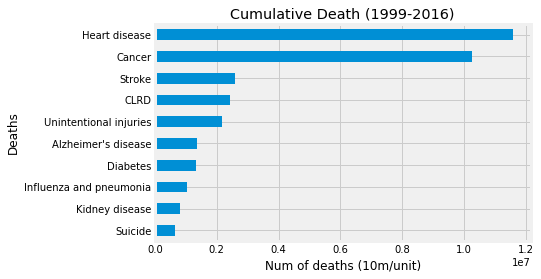

In [14]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
total_death_by_cause = df.groupby('cause_name').sum()['deaths'].sort_values(ascending=True)

print(total_death_by_cause.sort_values(ascending=False))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
percentage_cumulative_deaths = {}

total = total_death_by_cause.sum()

for key in total_death_by_cause.index:
    value = total_death_by_cause[key]
    percentage = value/total
    
    percentage_cumulative_deaths[key] = percentage

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

total_death_by_cause.plot(kind ='barh')

plt.title('Cumulative Death (1999-2016)',loc='center')
plt.ylabel('Deaths')
plt.xlabel('Num of deaths (10m/unit)')
plt.show()

In [15]:
percentage_cumulative_deaths

{'Suicide': 0.019001784026060137,
 'Kidney disease': 0.0236258010894571,
 'Influenza and pneumonia': 0.030380052640055638,
 'Diabetes': 0.038491680997473264,
 "Alzheimer's disease": 0.04015935880327911,
 'Unintentional injuries': 0.06368258394998785,
 'CLRD': 0.07119279212768821,
 'Stroke': 0.07544478133487442,
 'Cancer': 0.29955613974328876,
 'Heart disease': 0.33846502528783545}

**Insight:**
* Leading cause of death in America: **Heart Disease** (34%)
* Cancer and Heart diseases are accountable for over 20m deaths (64%) over 17 years. That's 1.2m deaths every year. On context, the third highest, stroke, is behind Cancer by 4.2x
* The lowest death - Suicide, only accounts 1.9% of the total deaths. An average deaths of 38,000 deaths every year

Let's look at the distribution of each cause of deaths from 1999-2016.

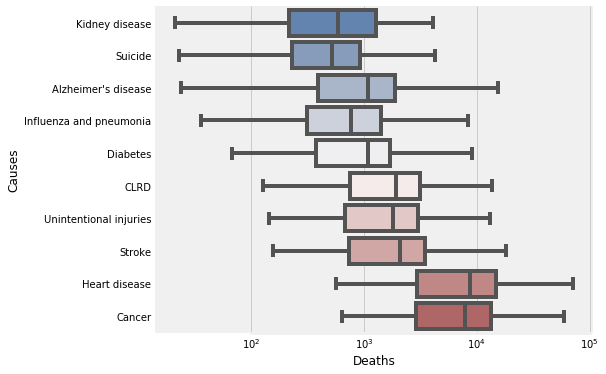

In [16]:
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

sns.boxplot(x="deaths", y="cause_name", data=df,
            whis="range", palette="vlag")


ax.xaxis.grid(True)
ax.set(ylabel="Causes")
ax.set(xlabel='Deaths')
sns.despine(trim=True, left=True)


plt.show()

The reason why we use Boxplot is because it allows us to display distribution from each factors.It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

Alzheimer's Disease has a large skewness but it's ranges from Q1 and Q3 (or the distribution from the mean) is close. 

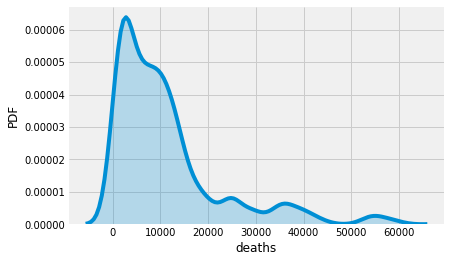

In [17]:
maple = df[df['cause_name']=="Cancer"]['deaths']
sns.distplot(maple,hist= False,kde_kws={"shade": True})
#plt.xlim(0,max(maple)/np.sqrt(2))

plt.ylabel('PDF')
sns.despine(left=True,bottom=True)

plt.show()

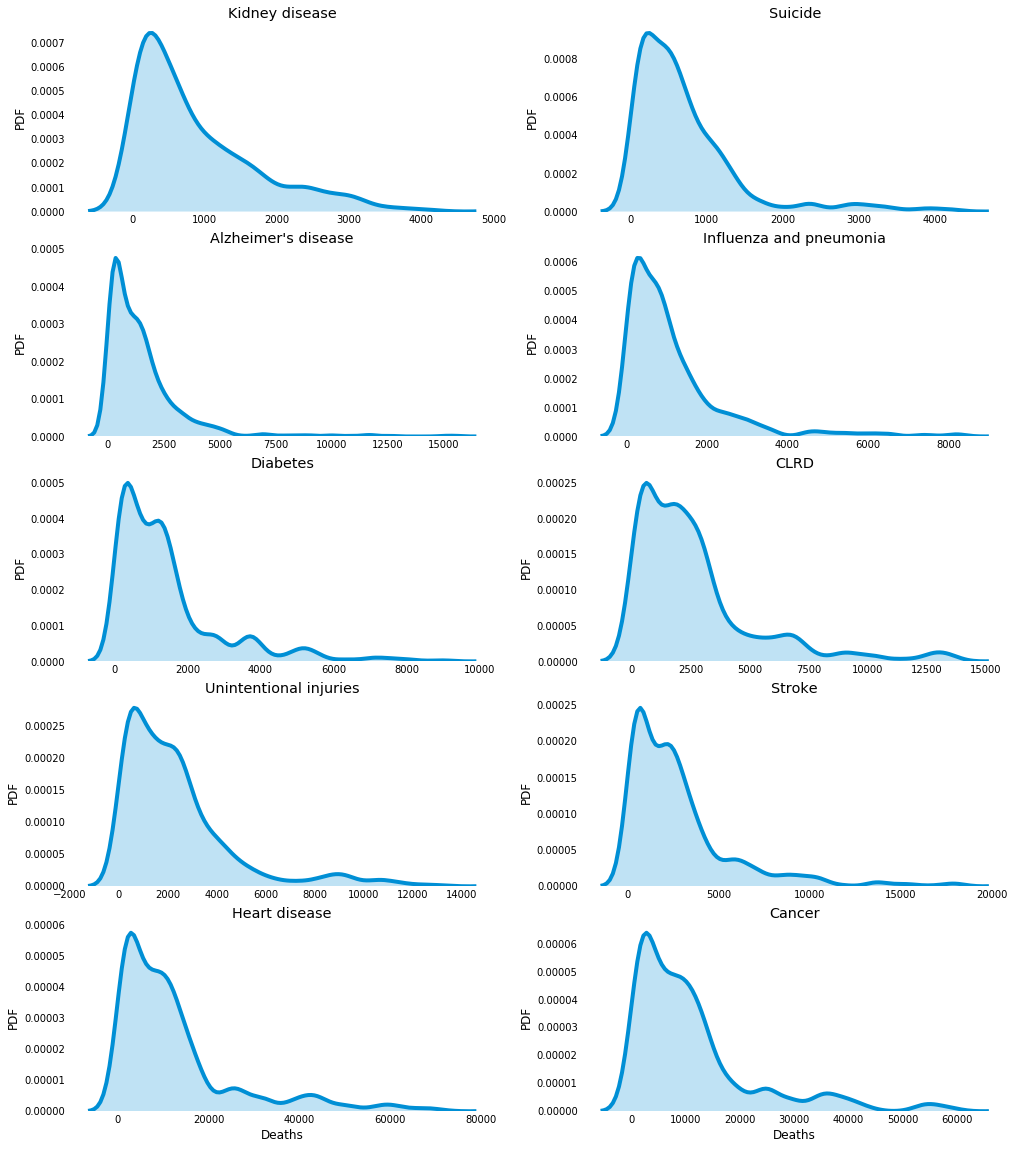

In [20]:
def create_distplot(col):
    col = df[df['cause_name']==col]['deaths']
    return col

fig = plt.figure(figsize= (15,20))

for idx, key in enumerate(df['cause_name'].unique()): 
    ax = fig.add_subplot(5,2,idx+1)
    value = create_distplot(key)
    sns.distplot(value,hist=False,kde_kws={'shade':True})
    
    ax.set_xlabel('')
    ax.set_ylabel('PDF')
    ax.set_title(key)
    ax.grid(False)
    ax.set_facecolor("white")
    
    if idx==8:
        ax.set_xlabel('Deaths')
    elif idx ==9:
        ax.set_xlabel('Deaths')
    
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)
        


plt.show()
